In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter

## Redshift Interpolator

In [2]:
from astropy.cosmology import WMAP9 as cosmo
import scipy as sp
from scipy import interpolate

In [14]:
z_mesh = np.linspace(0, 6, 600)

In [15]:
comov_mesh = cosmo.comoving_distance(z_mesh).value

Text(0.5, 0, 'Comoving Distance [Mpc]')

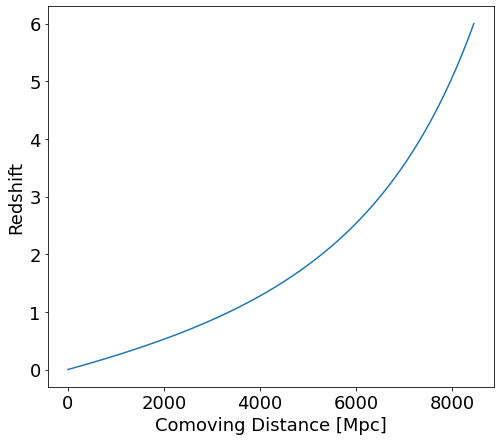

In [31]:
plt.plot(comov_mesh, z_mesh)
plt.ylabel('Redshift')
plt.xlabel('Comoving Distance [Mpc]')

In [25]:
f = interpolate.interp1d(comov_mesh, z_mesh)
comov_arr = np.linspace(0, 8000, 25)

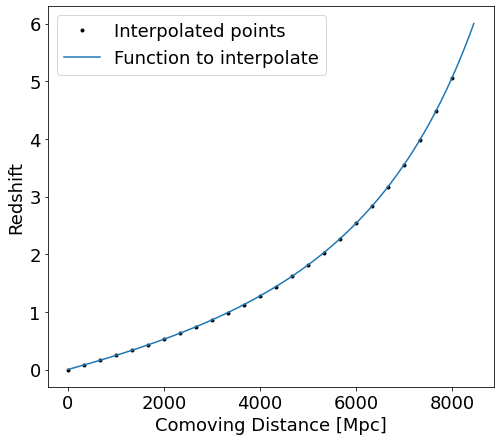

In [30]:
plt.plot(comov_arr, f(comov_arr), '.k', label = 'Interpolated points')
plt.plot(comov_mesh, z_mesh, label = 'Function to interpolate')
plt.ylabel('Redshift')
plt.xlabel('Comoving Distance [Mpc]')
plt.legend()

## Running Nate Sims through `limlam_mocker`

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter

In [2]:
# Initialize LineModel with default model
m = lim()
m_co_gauss = lim('TonyLi_PhI', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [3]:
m_co_ngauss = lim('TonyLi_PhII', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [4]:
map_zs = (m_co_gauss.mapinst.nu_rest/m_co_gauss.mapinst.nu_bincents) - 1

### With Adapted $\Omega_{field}$

$tan(\theta) = x/d$, where $\theta$ = angular size of object on the sky, $x$ = size of the object and $d$ = its distance

$x$ = 1 GPc, $d$ = 6.5 Gpc, so $\theta$ ~ 0.15 rad ~ 9 deg

so $\Omega_{field}$ ~ 81 deg²

- Gaussian Case

In [5]:
gauss_map = m_co_gauss.maps

Loading .npz catalogues...


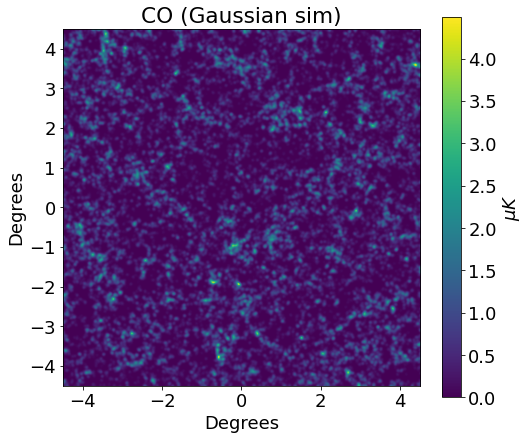

In [10]:
plt.imshow(gaussian_filter(gauss_map[:, :, 5], 5), extent = [-4.5, 4.5, -4.5, 4.5])
plt.xlabel('Degrees')
plt.ylabel('Degrees')
plt.title('CO (Gaussian sim)')
plt.colorbar(label = r'$\mu K$')

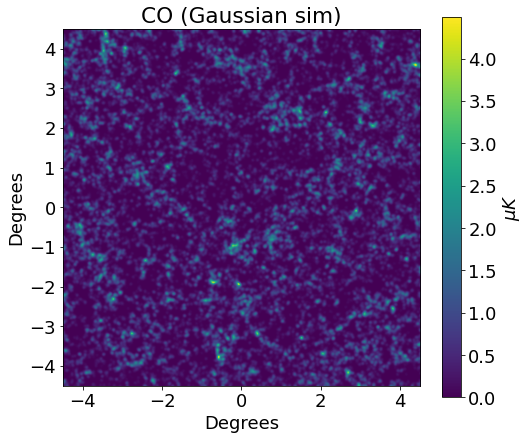

In [6]:
plt.imshow(gaussian_filter(gauss_map[:, :, 5], 5), extent = [-4.5, 4.5, -4.5, 4.5])
plt.xlabel('Degrees')
plt.ylabel('Degrees')
plt.title('CO (Gaussian sim)')
plt.colorbar(label = r'$\mu K$')

- Non-Gaussian; Instability

In [6]:
ngauss_map = m_co_ngauss.maps

Loading .npz catalogues...


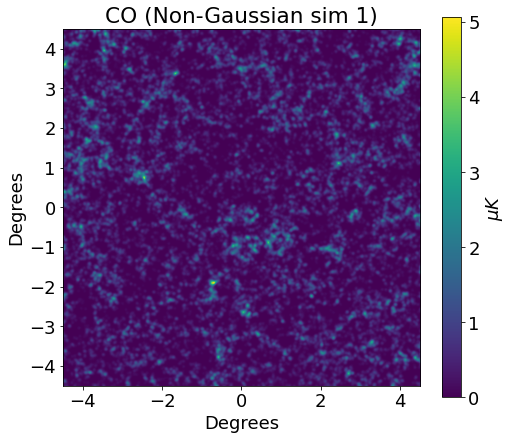

In [8]:
plt.imshow(gaussian_filter(ngauss_map[:, :, 5], 5), extent = [-4.5, 4.5, -4.5, 4.5])
plt.xlabel('Degrees')
plt.ylabel('Degrees')
plt.title('CO (Non-Gaussian sim 1)')
plt.colorbar(label = r'$\mu K$')

- Difference

In [20]:
diff = ngauss_map - gauss_map

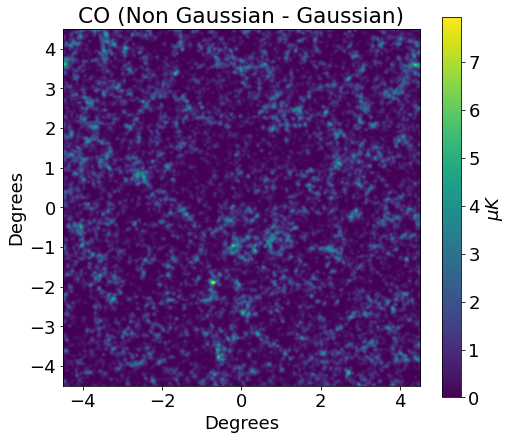

In [23]:
plt.imshow(gaussian_filter(np.abs(diff[:, :, 5]), 5), extent = [-4.5, 4.5, -4.5, 4.5])
plt.xlabel('Degrees')
plt.ylabel('Degrees')
plt.title('CO (Non Gaussian - Gaussian)')
plt.colorbar(label = r'$\mu K$')

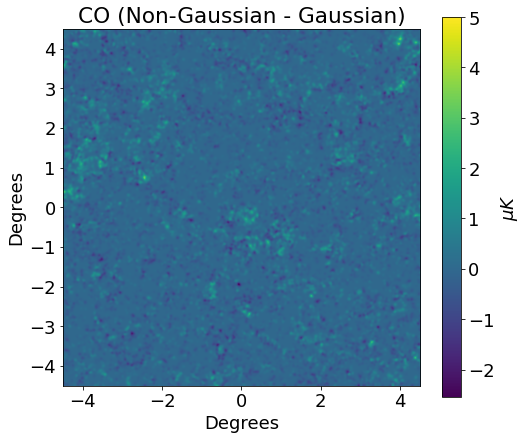

In [24]:
plt.imshow(gaussian_filter(diff[:, :, 5], 5), vmax = 5, extent = [-4.5, 4.5, -4.5, 4.5])
plt.ylabel('Degrees')
plt.xlabel('Degrees')
plt.title('CO (Non-Gaussian - Gaussian)')
plt.colorbar(label = r'$\mu K$')
#plt.savefig('diff_co.png', bbox_inches = "tight")

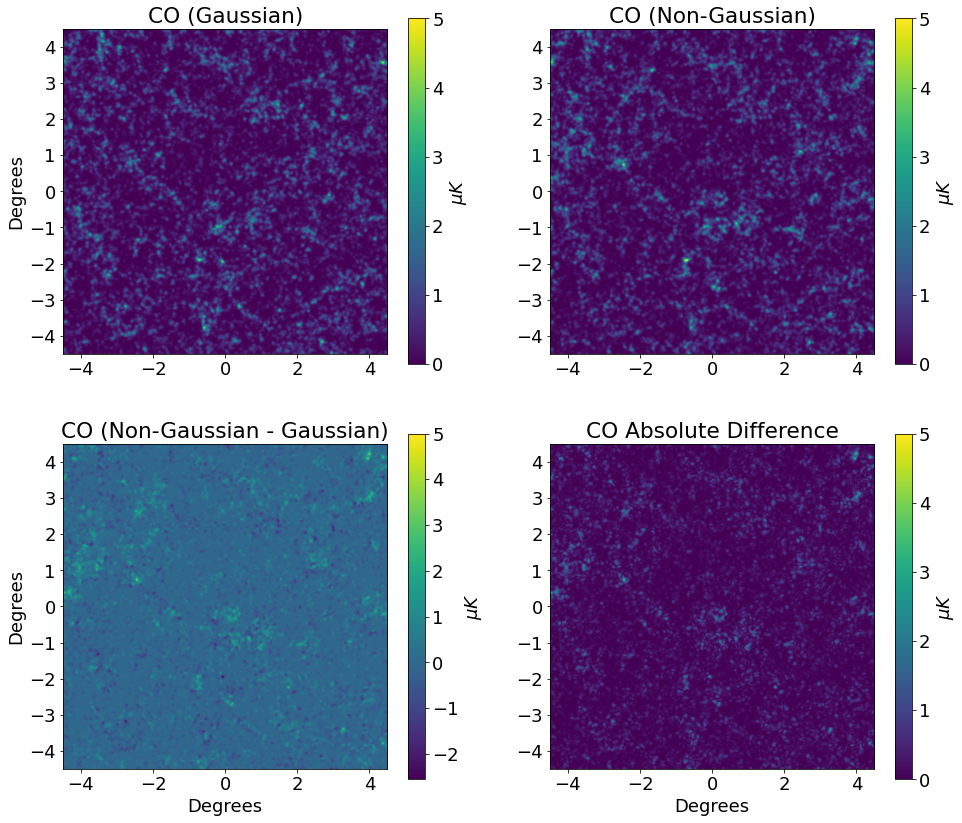

In [28]:
fig , axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 14))

plt.subplot(221)
plt.imshow(gaussian_filter(gauss_map[:, :, 5], 5), vmax = 5, extent = [-4.5, 4.5, -4.5, 4.5])
plt.ylabel('Degrees')
plt.title('CO (Gaussian)')
plt.colorbar(label = r'$\mu K$')

plt.subplot(222)
plt.imshow(gaussian_filter(ngauss_map[:, :, 5], 5), vmax = 5, extent = [-4.5, 4.5, -4.5, 4.5])
plt.title('CO (Non-Gaussian)')
plt.colorbar(label = r'$\mu K$')

plt.subplot(223)
plt.imshow(gaussian_filter((diff[:, :, 5]), 5), vmax = 5, extent = [-4.5, 4.5, -4.5, 4.5])
plt.xlabel('Degrees')
plt.ylabel('Degrees')
plt.title('CO (Non-Gaussian - Gaussian)')
plt.colorbar(label = r'$\mu K$')

plt.subplot(224)
plt.imshow(np.abs(gaussian_filter(diff[:, :, 5], 5)), vmax = 5, extent = [-4.5, 4.5, -4.5, 4.5])
plt.xlabel('Degrees')
plt.title('CO Absolute Difference')
plt.colorbar(label = r'$\mu K$')

### Power Spectra

In [16]:
gauss_pk = m_co_gauss.Pk_sim

In [17]:
ngauss_pk = m_co_ngauss.Pk_sim
k = m_co_gauss.k_sim

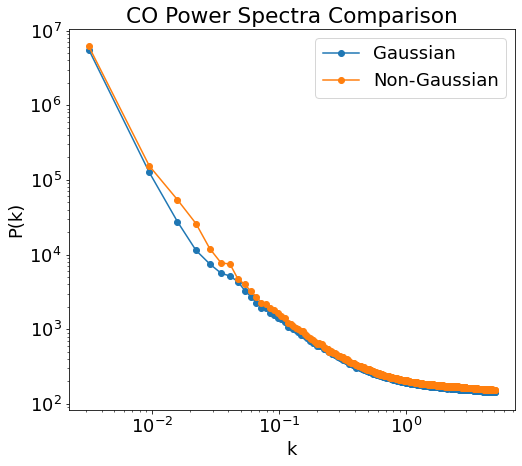

In [29]:
plt.plot(k, gauss_pk, '-o', label = 'Gaussian')
plt.plot(k, ngauss_pk, '-o', label = 'Non-Gaussian')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('CO Power Spectra Comparison')
plt.xscale('log')
plt.yscale('log')
plt.legend()
#plt.savefig('pspecs_comparison.png', bbox_inches = 'tight')

In [31]:
gauss_pk.unit

Unit("Mpc3 uK2")

In [30]:
from limlam_mocker.limlam_mocker import redshift_to_chi as rtc
from limlam_mocker.limlam_mocker import load_peakpatch_catalogue_cosmo as lppcc

x,y,z = m_co_gauss.mapinst.pix_binedges_x, m_co_gauss.mapinst.pix_binedges_y, m_co_gauss.mapinst.nu_binedges
t     = diff
cosmo = lppcc(m_co_gauss.halo_info)
zco   = rtc(m_co_gauss.mapinst.nu_rest/z - 1, cosmo)

avg_ctd = np.mean(zco)
xco     = x/(180)*np.pi*avg_ctd
yco     = y/(180)*np.pi*avg_ctd

dxco, dyco, dzco = [np.abs(np.mean(np.diff(d))) for d in (xco, yco, zco)]
Pk_3D            = np.abs(np.fft.rfftn(t)*dxco*dyco*dzco)**2/np.abs(np.ptp(xco)*np.ptp(yco)*np.ptp(zco))

kx        = 2*np.pi*np.fft.fftfreq(xco.size - 1, d = dxco)
ky        = 2*np.pi*np.fft.fftfreq(yco.size - 1, d = dyco)
kz        = 2*np.pi*np.fft.rfftfreq(zco.size - 1, d = dzco)

kgrid     = np.sqrt(sum(ki**2 for ki in np.meshgrid(kx, ky, kz, indexing = 'ij')))
dk        = max(np.diff(kx)[0], np.diff(ky)[0], np.diff(kz)[0])

kmax_dk   = int(np.ceil(max(np.amax(kx), np.amax(ky), np.amax(kz))/dk))
kbins     = np.linspace(0, kmax_dk*dk, kmax_dk + 1)

Pk_nmodes = np.histogram(kgrid[kgrid > 0], bins = kbins, weights = Pk_3D[kgrid > 0])[0]
nmodes    = np.histogram(kgrid[kgrid > 0], bins = kbins)[0]

Pk_diff = Pk_nmodes/nmodes
k_diff  = (kbins[1:] + kbins[:-1])/2

In [ ]:
plt.plot(k, gauss_pk, label = 'Gaussian')
plt.plot(k, ngauss_pk, label = 'Non-Gaussian')
plt.plot(k_diff, Pk_diff, label = 'Difference')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('CO Power Spectra Comparison')
plt.xscale('log')
plt.yscale('log')
plt.legend()

- Gaussian Lightcone path:

/mnt/scratch-lustre/njcarlson/peak-patch-runs/23.02.05_SBsuite/ng0/cenz6500Mpc/output/1000Mpc_n580_nb40_nt2_merge.npz

- Non-Gaussian, case 1

mnt/scratch-lustre/njcarlson/peak-patch-runs/23.02.05_SBsuite/ng7_m25/cenz6500Mpc/output/1000Mpc_n580_nb40_nt2_merge.npz

## May Runs

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter

In [2]:
# Initialize LineModel with default model
m = lim()
m_co_gauss = lim('TonyLi_PhI', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [3]:
m_co_ngauss = lim('TonyLi_PhII', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [4]:
gauss_map = m_co_gauss.maps

Loading .npz catalogues...


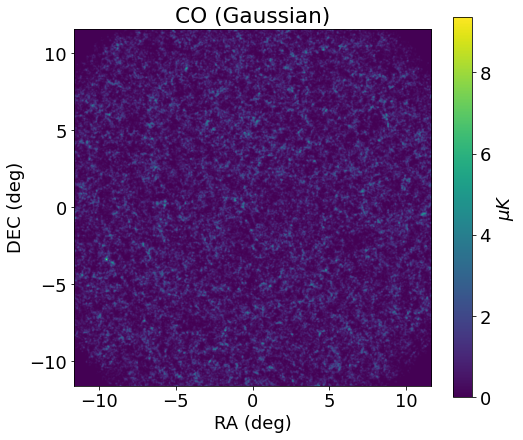

In [5]:
plt.imshow(gaussian_filter(gauss_map[:, :, 5], 5), extent = [-11.6, 11.6, -11.6, 11.6])
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.title('CO (Gaussian)')
plt.colorbar(label = r'$\mu K$')

In [ ]:
gauss_map_2 = m_co_ngauss.maps

In [ ]:
plt.imshow(gaussian_filter(gauss_map_2[:, :, 5], 5), extent = [-11.6, 11.6, -11.6, 11.6])
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.title('CO (Gaussian, v2)')
plt.colorbar(label = r'$\mu K$')